In [21]:
import pandas as pd
import numpy as np
import sys
from timeit import default_timer as timer
start = timer()

In [22]:
df = pd.read_csv('/content/AirBNB.csv')
df

<ipython-input-22-5dd5ba860461>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/AirBNB.csv')


,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000


In [23]:
print(type(df))
print(df.columns)
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Index(['id', 'room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')
(74111, 11)


In [24]:
sys.getsizeof(df)

21025132

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [26]:
df.nunique()

,0
id,74111
room_type,3
accommodates,16
bathrooms,17
cancellation_policy,3
cleaning_fee,2
instant_bookable,2
review_scores_rating,54
bedrooms,11
beds,18


In [27]:
df['accommodates'] = df['accommodates'].fillna(df['accommodates'].median()).astype('int8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74111 non-null  int8   
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(5), int64(1), int8(1), object(4)
memory usage: 5.7+ MB


In [28]:
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median()).astype('int8')

In [29]:
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].median()).astype('int8')

In [30]:
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median()).astype('int8')

In [31]:
df['beds'] = df['beds'].fillna(df['beds'].median()).astype('int8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74111 non-null  int8   
 3   bathrooms             74111 non-null  int8   
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  74111 non-null  int8   
 8   bedrooms              74111 non-null  int8   
 9   beds                  74111 non-null  int8   
 10  log_price             74111 non-null  float64
dtypes: float64(1), int64(1), int8(5), object(4)
memory usage: 3.7+ MB


In [32]:
df['room_type'] = df['room_type'].fillna(df['room_type'].value_counts().index[0])

In [33]:
df['cancellation_policy'] = df['cancellation_policy'].fillna(df['cancellation_policy'].value_counts().index[0])

In [34]:
df['cleaning_fee'] = df['cleaning_fee'].fillna(df['cleaning_fee'].value_counts().index[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74111 non-null  object 
 2   accommodates          74111 non-null  int8   
 3   bathrooms             74111 non-null  int8   
 4   cancellation_policy   74111 non-null  object 
 5   cleaning_fee          74111 non-null  bool   
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  74111 non-null  int8   
 8   bedrooms              74111 non-null  int8   
 9   beds                  74111 non-null  int8   
 10  log_price             74111 non-null  float64
dtypes: bool(1), float64(1), int64(1), int8(5), object(3)
memory usage: 3.3+ MB


In [35]:
sys.getsizeof(df)

15916658

In [36]:
df['instant_bookable'] = df['instant_bookable'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74111 non-null  object 
 2   accommodates          74111 non-null  int8   
 3   bathrooms             74111 non-null  int8   
 4   cancellation_policy   74111 non-null  object 
 5   cleaning_fee          74111 non-null  bool   
 6   instant_bookable      74111 non-null  bool   
 7   review_scores_rating  74111 non-null  int8   
 8   bedrooms              74111 non-null  int8   
 9   beds                  74111 non-null  int8   
 10  log_price             74111 non-null  float64
dtypes: bool(2), float64(1), int64(1), int8(5), object(2)
memory usage: 2.8+ MB


In [37]:
sys.getsizeof(df)

11692331

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 640x480 with 0 Axes>

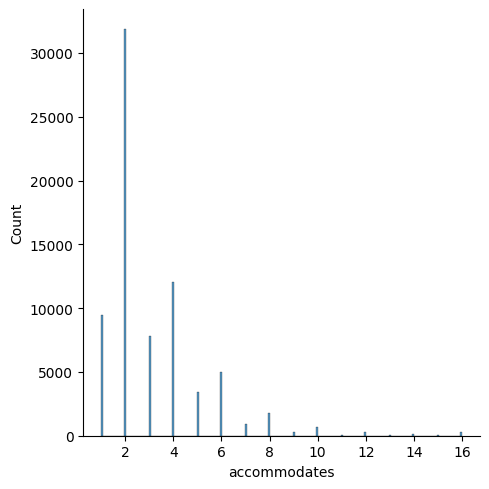

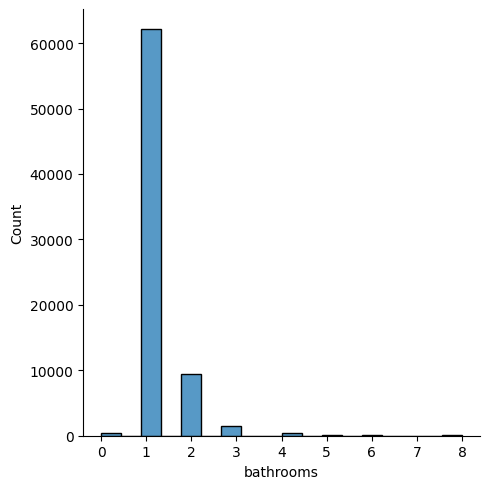

<Figure size 640x480 with 0 Axes>

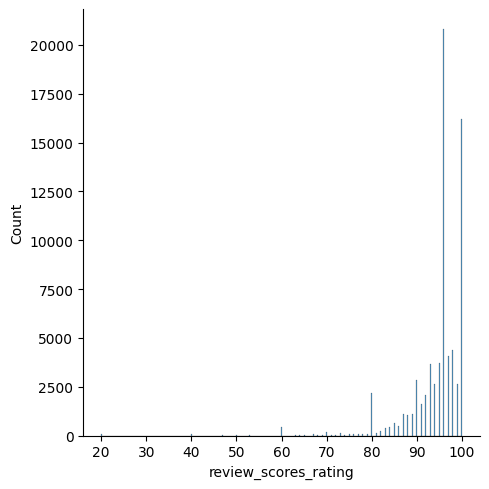

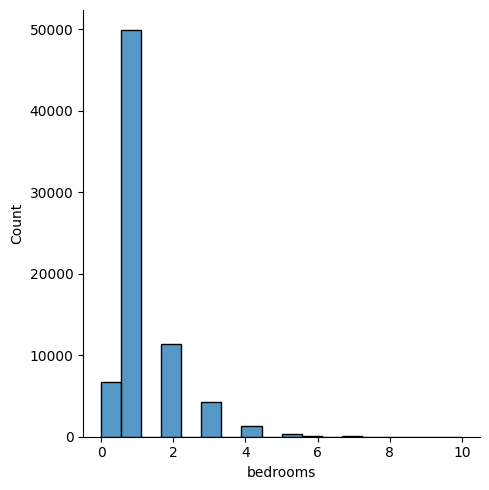

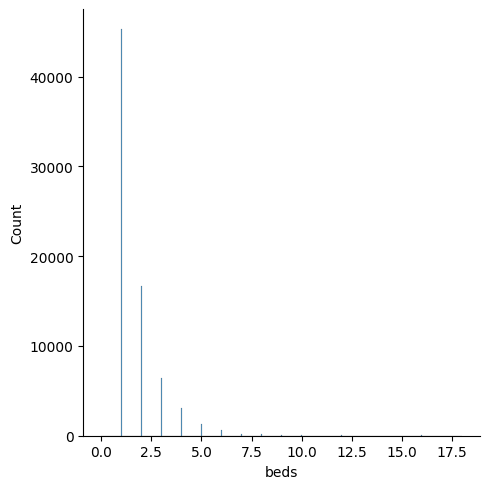

In [42]:
for j,i in enumerate(df.columns):
  if df[i].dtype == 'int8':
    plt.figure(j)
    sns.displot(df[i], kde = False)

<Axes: xlabel='review_scores_rating'>

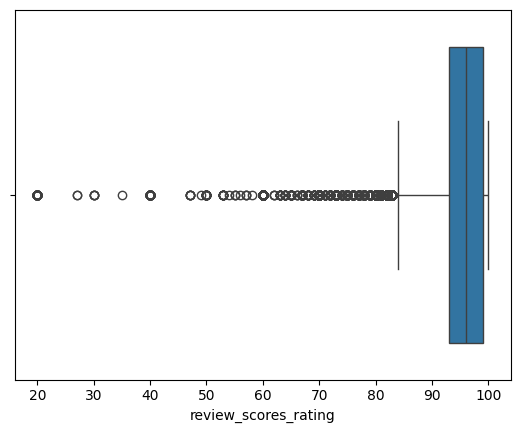

In [44]:
sns.boxplot(df['review_scores_rating'], orient = 'h')

<Axes: xlabel='log_price', ylabel='room_type'>

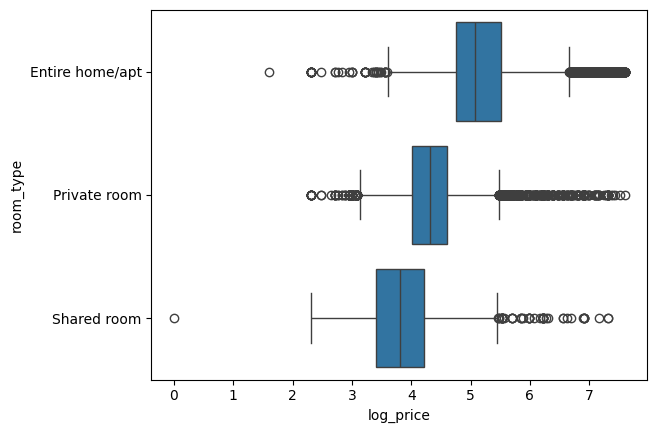

In [47]:
sns.boxplot(data = df, x = 'log_price', y='room_type')

In [48]:
df.nunique()

,0
id,74111
room_type,3
accommodates,16
bathrooms,9
cancellation_policy,3
cleaning_fee,2
instant_bookable,1
review_scores_rating,54
bedrooms,11
beds,18


<Axes: xlabel='accommodates'>

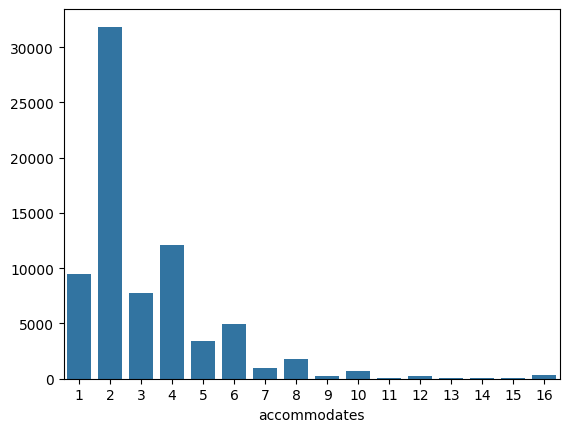

In [55]:
fig_x_y = df.groupby('accommodates')['accommodates'].count()
sns.barplot(x = fig_x_y.index , y = fig_x_y.values)

<Axes: xlabel='room_type', ylabel='log_price'>

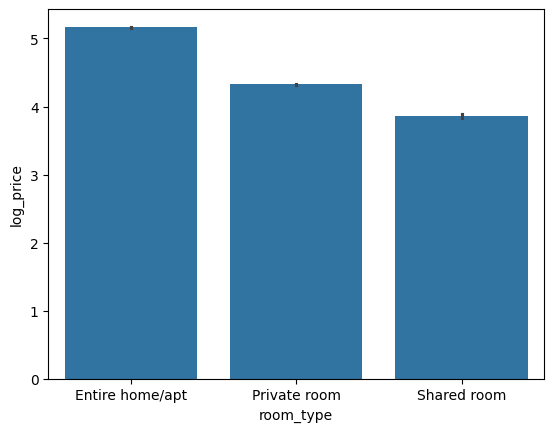

In [56]:
sns.barplot(data = df, x = 'room_type', y = 'log_price')

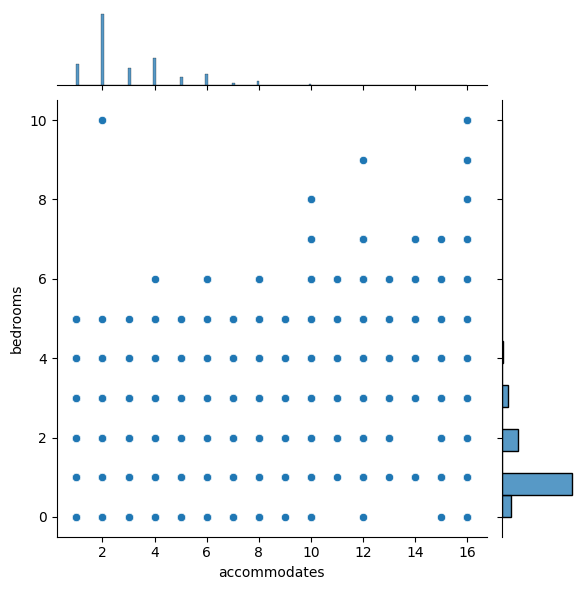

In [59]:
sns.jointplot(x = df['accommodates'], y = df['bedrooms'])

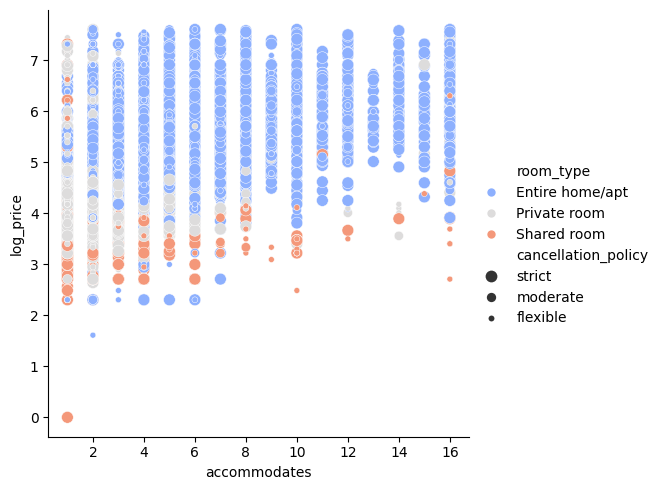

In [68]:
sns.relplot(
    data = df,
    x = 'accommodates', y = 'log_price',
    size = 'cancellation_policy',
    hue = 'room_type',
    palette = 'coolwarm'
)

<Axes: xlabel='log_price', ylabel='room_type'>

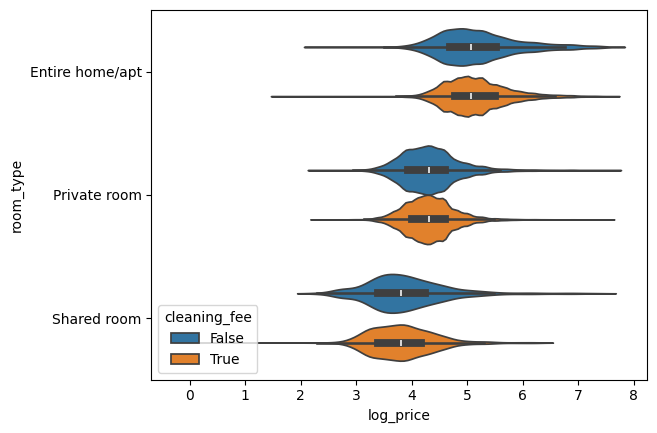

In [74]:
sns.violinplot(data = df, y = 'room_type', x = 'log_price', hue = 'cleaning_fee')

<Axes: xlabel='log_price', ylabel='room_type'>

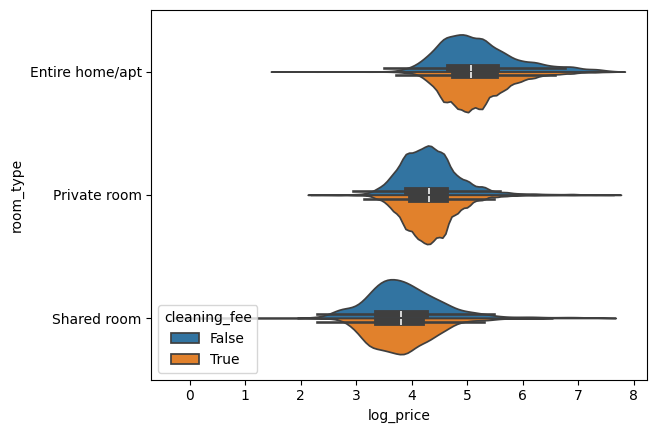

In [91]:
sns.violinplot(data = df, y = 'room_type', x = 'log_price', hue = 'cleaning_fee', split = True)

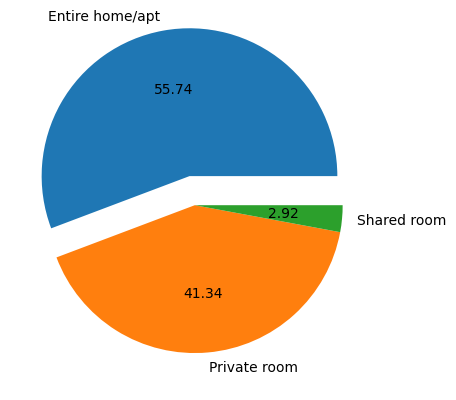

In [81]:
fig_x_y = df.groupby('room_type')['room_type'].count()
plt.pie(fig_x_y, labels = fig_x_y.index, autopct = '%.2f', explode = [0.2, 0, 0])
plt.show()

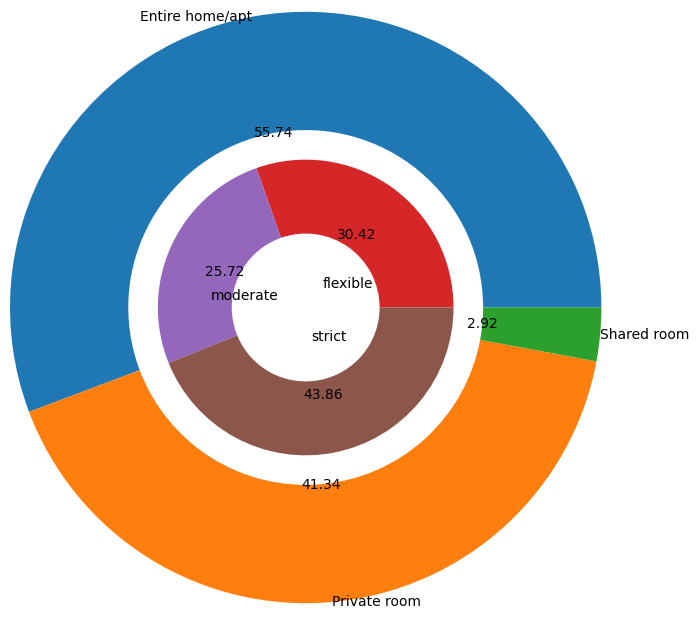

In [84]:
fig_x_y_cp = df.groupby('cancellation_policy')['cancellation_policy'].count()
plt.pie(fig_x_y, labels = fig_x_y.index, autopct = '%.2f', wedgeprops = {'width': 0.8}, radius = 2, labeldistance = 1)
plt.pie(fig_x_y_cp, labels = fig_x_y_cp.index, autopct = '%.2f', wedgeprops = {'width': 0.5}, radius = 1, labeldistance = 0.2)
plt.show()

<Axes: xlabel='review_scores_rating', ylabel='log_price'>

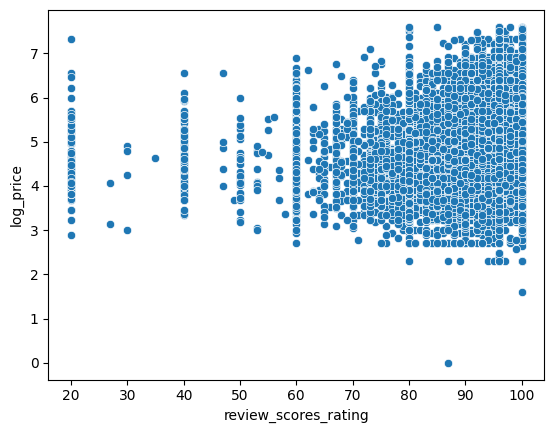

In [87]:
sns.scatterplot(df, x = 'review_scores_rating', y = 'log_price')

In [88]:
df

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3,1,strict,True,True,100,1,1,5.010635
1,6304928,Entire home/apt,7,1,strict,True,True,93,3,3,5.129899
2,7919400,Entire home/apt,5,1,moderate,True,True,92,1,3,4.976734
3,13418779,Entire home/apt,4,1,flexible,True,True,96,2,2,6.620073
4,3808709,Entire home/apt,2,1,moderate,True,True,40,0,1,4.744932
...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,Private room,1,1,flexible,False,True,96,1,1,4.605170
74107,13281809,Entire home/apt,4,2,moderate,True,True,93,2,4,5.043425
74108,18688039,Entire home/apt,5,1,moderate,True,True,94,2,2,5.220356
74109,17045948,Entire home/apt,2,1,strict,True,True,96,0,2,5.273000
